<a href="https://colab.research.google.com/github/egagli/glacier-velocity-from-sar/blob/Ahmed/Dense_Optical_Tracking_Velocity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import glob
import cv2 as cv
import numpy as np
from tqdm import notebook
from matplotlib import pyplot as plt

In [12]:
!git clone -b Ahmed https://github.com/egagli/glacier-velocity-from-sar.git


fatal: destination path 'glacier-velocity-from-sar' already exists and is not an empty directory.


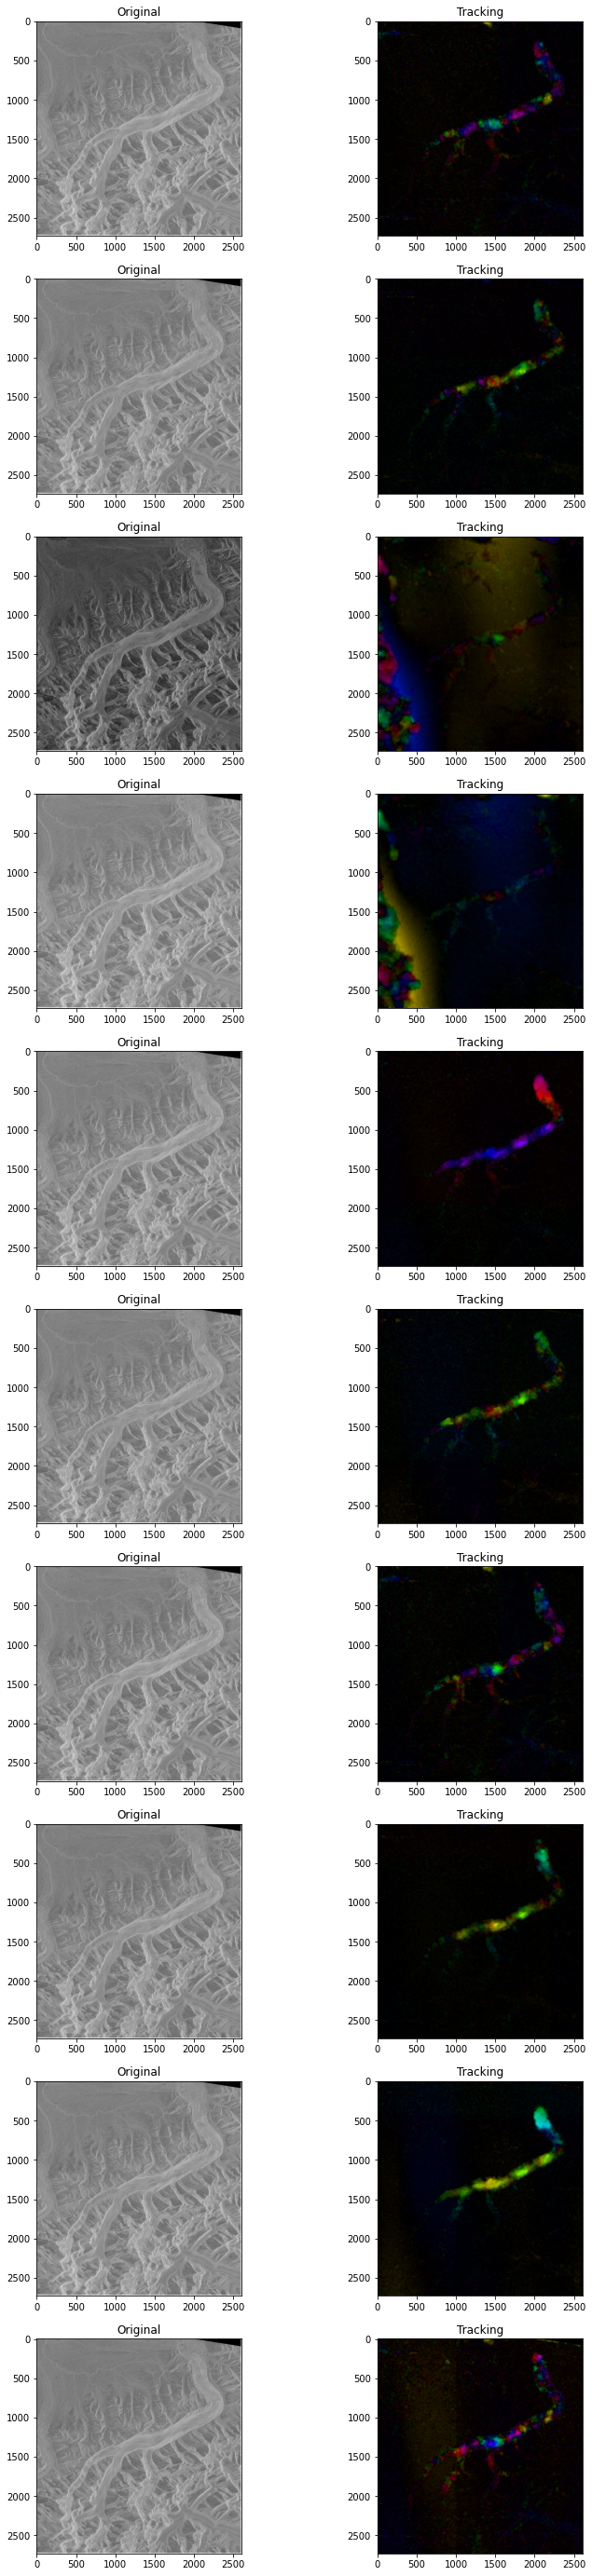

In [31]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow


# The video feed is read in as
# a VideoCapture object
cap = cv.imread("/content/glacier-velocity-from-sar/images/0image.png")

import glob
import cv2 as cv
import numpy as np
from tqdm import notebook
from matplotlib import pyplot as plt

first_frame = cv.imread('/content/glacier-velocity-from-sar/images/0image.png')
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)
mask[..., 1] = 255

f,ax=plt.subplots(len(glob.glob('/content/glacier-velocity-from-sar/images/*.png')),2,figsize=(12,50))
for i, filename in notebook.tqdm(enumerate(glob.glob('/content/glacier-velocity-from-sar/images/*.png'))):  
    frame = cv.imread(filename)
    
    ax[i,0].imshow(frame)
    ax[i,0].set_title('Original')
    
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray, 
                                       None,
                                       0.5, 3, 15, 3, 5, 1.2, 0)
      
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])

    mask[..., 0] = angle * 180 / np.pi / 2
      
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
      
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
      
    ax[i,1].imshow(rgb)
    ax[i,1].set_title('Tracking')
      
    prev_gray = gray